<a href="https://colab.research.google.com/github/Mohamed-S-Helal/dev1/blob/main/Copy_of_chestxray_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mounting Google Drive to load data

from google.colab import drive  
drive.mount('/content/drive')  

Mounted at /content/drive


# ***pytorch install***


In [2]:
!pip3 install torch==1.10.0+cu102 torchvision==0.11.1+cu102 torchaudio===0.10.0+cu102 -f https://download.pytorch.org/whl/cu102/torch_stable.html -q

     |██████████████████████████████▎ | 834.1 MB 1.2 MB/s eta 0:00:39tcmalloc: large alloc 1147494400 bytes == 0x55bc2a16c000 @  0x7f62bd5fa615 0x55bbf0d733bc 0x55bbf0e5418a 0x55bbf0d761cd 0x55bbf0e68b3d 0x55bbf0dea458 0x55bbf0de502f 0x55bbf0d77aba 0x55bbf0dea2c0 0x55bbf0de502f 0x55bbf0d77aba 0x55bbf0de6cd4 0x55bbf0e69986 0x55bbf0de6350 0x55bbf0e69986 0x55bbf0de6350 0x55bbf0e69986 0x55bbf0de6350 0x55bbf0d77f19 0x55bbf0dbba79 0x55bbf0d76b32 0x55bbf0dea1dd 0x55bbf0de502f 0x55bbf0d77aba 0x55bbf0de6cd4 0x55bbf0de502f 0x55bbf0d77aba 0x55bbf0de5eae 0x55bbf0d779da 0x55bbf0de6108 0x55bbf0de502f
     |████████████████████████████████| 881.9 MB 20 kB/s 
     |████████████████████████████████| 23.2 MB 12.6 MB/s 
     |████████████████████████████████| 2.9 MB 39.3 MB/s 


#***Data Downloading***

In [5]:
# !/usr/bin/env python3
# # Download the 56 zip files in Images_png in batches
import urllib.request
from tqdm import tqdm

# URLs for the zip files
links = [
   'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
    'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
    'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
	'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
    'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
	'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
	'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
    'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
	'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
	'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
	'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
	'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
]

for idx, link in enumerate(links):
     fn = 'images_%02d.tar.gz' % (idx+1)
     print('downloading'+fn+'...')
     urllib.request.urlretrieve(link, fn)  # download the zip file

print("Download complete. Please check the checksums")

downloadingimages_01.tar.gz...
downloadingimages_02.tar.gz...


KeyboardInterrupt: ignored

In [ ]:
!mkdir Dataset 

In [ ]:
import shutil
shutil.unpack_archive("/content/drive/MyDrive/Dataset/Dataset/images_01.tar.gz", "Dataset")
shutil.unpack_archive("/content/drive/MyDrive/Dataset/Dataset/images_02.tar.gz", "Dataset")
shutil.unpack_archive("/content/drive/MyDrive/Dataset/Dataset/images_03.tar.gz", "Dataset")
shutil.unpack_archive("/content/drive/MyDrive/Dataset/Dataset/images_04.tar.gz", "Dataset")
shutil.unpack_archive("/content/drive/MyDrive/Dataset/Dataset/images_05.tar.gz", "Dataset")
shutil.unpack_archive("/content/drive/MyDrive/Dataset/Dataset/images_06.tar.gz", "Dataset")
shutil.unpack_archive("/content/drive/MyDrive/Dataset/Dataset/images_07.tar.gz", "Dataset")
shutil.unpack_archive("/content/drive/MyDrive/Dataset/Dataset/images_08.tar.gz", "Dataset")
shutil.unpack_archive("/content/drive/MyDrive/Dataset/Dataset/images_09.tar.gz", "Dataset")
shutil.unpack_archive("/content/drive/MyDrive/Dataset/Dataset/images_10.tar.gz", "Dataset")
shutil.unpack_archive("/content/drive/MyDrive/Dataset/Dataset/images_11.tar.gz", "Dataset")
shutil.unpack_archive("/content/drive/MyDrive/Dataset/Dataset/images_12.tar.gz", "Dataset")

#***read images and corresponding labels***

In [ ]:
import torch
from torch.utils.data import Dataset
from PIL import Image
import os


class ChestXrayDataSet(Dataset):
    def __init__(self, data_dir, image_list_file, transform=None):
        """
        Args:
            data_dir: path to image directory.
            image_list_file: path to the file containing images
                with corresponding labels.
            transform: optional transform to be applied on a sample.
        """
        image_names = []
        labels = []
        with open(image_list_file, "r") as f:
            for line in f:
                items = line.split()
                image_name= items[0]
                label = items[1:]
                label = [int(i) for i in label]
                image_name = os.path.join(data_dir, image_name)
                image_names.append(image_name)
                labels.append(label)

        self.image_names = image_names
        self.labels = labels
        self.transform = transform

    def __getitem__(self, index):
        """
        Args:
            index: the index of item
        Returns:
            image and its labels
        """
        image_name = self.image_names[index]
        image = Image.open(image_name).convert('RGB')
        label = self.labels[index]
        if self.transform is not None:
            image = self.transform(image)
        return image, torch.FloatTensor(label)

    def __len__(self):
        return len(self.image_names)


In [ ]:
!git clone https://github.com/arnoweng/CheXNet.git 

Cloning into 'CheXNet'...
remote: Enumerating objects: 62, done.
remote: Total 62 (delta 0), reused 0 (delta 0), pack-reused 62
Unpacking objects: 100% (62/62), done.


In [ ]:
!git clone https://github.com/mlmed/torchxrayvision.git

Cloning into 'torchxrayvision'...
remote: Enumerating objects: 1406, done.
remote: Counting objects: 100% (484/484), done.
remote: Compressing objects: 100% (311/311), done.
remote: Total 1406 (delta 293), reused 273 (delta 157), pack-reused 922
Receiving objects: 100% (1406/1406), 41.75 MiB | 12.99 MiB/s, done.
Resolving deltas: 100% (827/827), done.


In [ ]:
!pip install -r /content/torchxrayvision/requirements.txt

In [ ]:
%cd torchxrayvision/

/content/torchxrayvision/torchxrayvision


In [ ]:
%cd /root

/root


In [ ]:
%ls 

autoencoders.py   data/        __init__.py  _version.py
baseline_models/  datasets.py  models.py


#***The main CheXNet model implementation***

In [ ]:
!pip install keras --upgrade

In [ ]:
# encoding: utf-8

"""
The main CheXNet model implementation.
"""


import os
import numpy as np
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.metrics import roc_auc_score


CKPT_PATH = './content/CheXNet/model.pth.tar'
N_CLASSES = 14
CLASS_NAMES = [ 'Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Mass', 'Nodule', 'Pneumonia',
                'Pneumothorax', 'Consolidation', 'Edema', 'Emphysema', 'Fibrosis', 'Pleural_Thickening', 'Hernia']
DATA_DIR = '/content/Dataset/images'
TEST_IMAGE_LIST = '/content/CheXNet/ChestX-ray14/labels/test_list.txt'
BATCH_SIZE = 2


def main():

    cudnn.benchmark = True

    # initialize and load the model
    model = DenseNet121(N_CLASSES).cuda()
    model = torch.nn.DataParallel(model).cuda()

    if os.path.isfile(CKPT_PATH):
        print("=> loading checkpoint")
        checkpoint = torch.load(CKPT_PATH)
        model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded checkpoint")
    else:
        print("=> no checkpoint found")

    normalize = transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])

    test_dataset = ChestXrayDataSet(data_dir=DATA_DIR,
                                    image_list_file=TEST_IMAGE_LIST,
                                    transform=transforms.Compose([
                                        transforms.Resize(256),
                                        transforms.TenCrop(224),
                                        transforms.Lambda
                                        (lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
                                        transforms.Lambda
                                        (lambda crops: torch.stack([normalize(crop) for crop in crops]))
                                    ]))
    test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE,
                             shuffle=False, num_workers=8, pin_memory=True)

    # initialize the ground truth and output tensor
    gt = torch.FloatTensor()
    gt = gt.cuda()
    pred = torch.FloatTensor()
    pred = pred.cuda()

    # switch to evaluate mode
    model.eval()

    for i, (inp, target) in enumerate(test_loader):
        target = target.cuda()
        gt = torch.cat((gt, target), 0)
        bs, n_crops, c, h, w = inp.size()
        input_var = torch.autograd.Variable(inp.view(-1, c, h, w).cuda(), volatile=True)
        output = model(input_var)
        output_mean = output.view(bs, n_crops, -1).mean(1)
        pred = torch.cat((pred, output_mean.data), 0)

    AUROCs = compute_AUCs(gt, pred)
    AUROC_avg = np.array(AUROCs).mean()
    print('The average AUROC is {AUROC_avg:.3f}'.format(AUROC_avg=AUROC_avg))
    for i in range(N_CLASSES):
        print('The AUROC of {} is {}'.format(CLASS_NAMES[i], AUROCs[i]))


def compute_AUCs(gt, pred):
    """Computes Area Under the Curve (AUC) from prediction scores.

    Args:
        gt: Pytorch tensor on GPU, shape = [n_samples, n_classes]
          true binary labels.
        pred: Pytorch tensor on GPU, shape = [n_samples, n_classes]
          can either be probability estimates of the positive class,
          confidence values, or binary decisions.

    Returns:
        List of AUROCs of all classes.
    """
    AUROCs = []
    gt_np = gt.cpu().numpy()
    pred_np = pred.cpu().numpy()
    for i in range(N_CLASSES):
        AUROCs.append(roc_auc_score(gt_np[:, i], pred_np[:, i]))
    return AUROCs


class DenseNet121(nn.Module):
    """Model modified.

    The architecture of our model is the same as standard DenseNet121
    except the classifier layer which has an additional sigmoid function.

    """
    def __init__(self, out_size):
        super(DenseNet121, self).__init__()
        self.densenet121 = torchvision.models.densenet121(pretrained=True)
        num_ftrs = self.densenet121.classifier.in_features
        self.densenet121.classifier = nn.Sequential(
            nn.Linear(num_ftrs, out_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.densenet121(x)
        return x


if __name__ == '__main__':
    main()

KeyboardInterrupt: ignored

In [ ]:
%ls

autoencoders.py   data/        __init__.py  __pycache__/
baseline_models/  datasets.py  models.py    _version.py


#***torchx-rayvision***#

In [ ]:
%load_ext autoreload
%autoreload 2
!pip install torchxrayvision

     |████████████████████████████████| 29.0 MB 1.2 MB/s 


Lung Lesion doesn't exist. Adding nans instead.
Fracture doesn't exist. Adding nans instead.
Lung Opacity doesn't exist. Adding nans instead.
Enlarged Cardiomediastinum doesn't exist. Adding nans instead.
{'Tube', 'Aortic Elongation', 'Air Trapping', 'Costophrenic Angle Blunting', 'Scoliosis', 'Flattened Diaphragm', 'Hemidiaphragm Elevation', 'Hilar Enlargement', 'Tuberculosis', 'Support Devices', 'Granuloma', 'Aortic Atheromatosis', 'Bronchiectasis'} will be dropped
Lung Lesion doesn't exist. Adding nans instead.
Lung Opacity doesn't exist. Adding nans instead.
Enlarged Cardiomediastinum doesn't exist. Adding nans instead.
If this fails you can run `wget https://github.com/mlmed/torchxrayvision/releases/download/v1/nih-densenet121-d121-tw-lr001-rot45-tr15-sc15-seed0-best.pt -O /root/.torchxrayvision/models_data/nih-densenet121-d121-tw-lr001-rot45-tr15-sc15-seed0-best.pt`
[██████████████████████████████████████████████████]
If this fails you can run `wget https://github.com/mlmed/torch

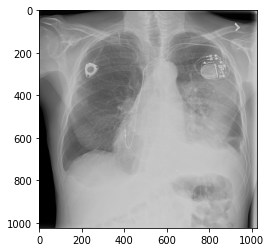

In [ ]:
import os,sys
sys.path.insert(0,"..")
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import sys
import torch.nn.functional as F
import torchxrayvision as xrv
import torchvision.transforms
transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),xrv.datasets.XRayResizer(224)])
d_nih = xrv.datasets.NIH_Dataset(imgpath="/content/Dataset/images")
xrv.datasets.relabel_dataset(xrv.datasets.default_pathologies, d_nih)
d_pc = xrv.datasets.PC_Dataset(imgpath="/content/Dataset/images")
xrv.datasets.relabel_dataset(xrv.datasets.default_pathologies, d_pc)
sample = d_nih[40]
plt.imshow(sample["img"][0], cmap="Greys_r");
dict(zip(d_pc.pathologies,sample["lab"]))
model = xrv.models.DenseNet(weights="nih")
#model = xrv.models.ResNet(weights="resnet50-res512-all")
with torch.no_grad():
    out = model(torch.from_numpy(sample["img"]).unsqueeze(0)).cpu()
    
dict(zip(model.pathologies,zip(out[0].detach().numpy(), sample["lab"])))
model = xrv.models.DenseNet(weights="all")
#model = xrv.models.ResNet(weights="resnet50-res512-all")
with torch.no_grad():
    out = model(torch.from_numpy(sample["img"]).unsqueeze(0)).cpu()
    
dict(zip(model.pathologies,zip(out[0].detach().numpy(), sample["lab"])))
# does the model align with the dataset?
dict(zip(model.pathologies,xrv.datasets.default_pathologies))
# small test eval
outs = []
labs = []
with torch.no_grad():
    for i in np.random.randint(0,len(d_nih),200):
        sample = d_nih[i]
        print("Working on Sample Number ", i)
        labs.append(sample["lab"])
        out = model(torch.from_numpy(sample["img"]).unsqueeze(0)).cpu()
        out = torch.sigmoid(out)
        outs.append(out.detach().numpy()[0])
        import sklearn, sklearn.metrics
for i in range(14):
    if len(np.unique(np.asarray(labs)[:,i])) > 1:
        auc = sklearn.metrics.roc_auc_score(np.asarray(labs)[:,i], np.asarray(outs)[:,i])
    else:
        auc = "(Only one class observed)"
    print(xrv.datasets.default_pathologies[i], auc)

In [ ]:
labs

[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., nan, nan, nan, nan]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., nan, nan, nan, nan]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., nan, nan, nan, nan]),
 array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., nan, nan, nan, nan]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., nan, nan, nan, nan]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., nan, nan, nan, nan]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0., nan, nan, nan, nan]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., nan, nan, nan, nan]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., nan, nan, nan, nan]),
 array([ 0.,  0.,  0.,  0., 

###***confusion matrix***###

In [ ]:
y_pred = model.predict(d_nih[i]) 

AttributeError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
all_labels=['Atelectasis', 'Cardiomegaly', 'Edema',	'Effusion',	'Infiltration',	'Mass',	'Nodule', 'Hernia', 'Emphysema', 'Consolidation', 'Pneumothorax', 'Pleural_Thickening','Pneumonia']
cm=confusion_matrix(np.argmax(d_nih,axis=1),np.argmax(y_pred,axis=1))
print(cm)

In [ ]:
all_labels=['Atelectasis', 'Cardiomegaly', 'Edema',	'Effusion',	'Infiltration',	'Mass',	'Nodule', 'Hernia', 'Emphysema', 'Consolidation', 'Pneumothorax', 'Pleural_Thickening','Pneumonia']
sns.heatmap(cm, annot=True,xticklabels=all_labels,yticklabels=all_labels)

plt.show()